## Capstone Project 1: Predicting Success in Kickstarter Campaigns

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kickstarter is a funding platform for creative projects. When creative groups, companies, or individuals have an idea, a clear plan and a final funding goal, they can submit their projects to the Kickstarter platform in order to garner public support and funding. The Kickstarter platform provides a space where where campaigns can both ask for funding donations, and provide incentives and rewards to those who pledge funds to the project.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Kickstarter platform is funded by fees collected from each donation, and from the overall funding amount when a campaign is successful. Kickstarter applies a 5% fee to any successful campaigns, and collects a 3-5% payment processing fee per donation, depending on the donation amount. If a campaign is not successful and does not reach their funding goal, Kickstarter does not collect the standard 5% fee. Therefore, in order for Kickstarter to continue their success, and increase their profits, they must host successful campaigns that reach or exceed their funding goal. Currently, successful Kickstarter campaigns are estimated at 35% of total campaigns, while failed campaigns are closer to 52%.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;An analysis of successful Kickstarter campaigns will address metrics for campaigns that reach and exceed their funding goals. This includes the category of campaign, rewards/incentives offered, funding goal, funding time frame, and campaign description.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The ability to predict a successful Kickstarter campaign will be of great benefit to both Kickstarter as a company, and to companies and creators who launch campaigns on their website. Kickstarter has an inherent intrerest in running successful campaigns because of their fee structure, and their overall profits as a company. Additionally, competition from other crowdfunding platforms are gaining popularity and Kickstarter will need remain competitive in offering services and exposure to clients that will lead to succesful campaign outcomes.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Companies and creators who are launching campaigns also have an inherent interest in understanding the factors that create a successful campaign. Having a campaign or project reach or exceed funding status could alter the trajectory of a product or idea. Alternatively, campaigns and projects that end up failing to meet their funding goals could end up on life support.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By analyzing trends in successful campaigns, Kickstarter will be able to determine which campaigns are more likely to reach or exceed funded status. Armed with this data insight, Kickstarter will be able to make data driven, impactful decisions in regards to
    - Services offered to clients
    - Fees that are collected from clients and from contributors, 
    - Campaign guidelines and recommendations


### 5.4 Data Wrangling

The dataset that was used for analysis was provided in one .csv file, obtained from [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv). At first glance, the data is fairly clean containing 15 columns with 378,661 rows of data. Each Kickstarter campaign is represented by one row of data including the campaign name, the main category that the campaign falls under, the currency type that pledges are converted to, the campaign deadline, funding goal, the state of the campaign, how many backers supported the campaign, what country the campaign originated from, and then two columns that are conversions of the pledged amount column converted to USD. 

To start off the data cleaning process, Python packages that will be utilized are imported and the data is read into a pandas data frame. The packages that I believe will be the most useful in the cleaning process are pandas and numPy. 

##### Basic Data Exploration

In [1]:
#import packages
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from numpy.random import seed
from scipy.stats import t
from scipy.stats import ttest_ind
from wordcloud import WordCloud, STOPWORDS
from six.moves import range
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import itertools
import collections
import nltk
from scipy.stats import shapiro
from scipy.stats import wilcoxon
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import scipy.stats as st

In [2]:
#read in csv
df = pd.read_csv(r'/Users/kellipeluso/Desktop/Springboard/ks-projects-201801.csv', encoding = 'latin')

I began the cleaning process by determining whether any data was duplicated. Each Kickstarter campaign is assigned a campaign ID, and I proceeded to work on deduplication based off of this column. In order to check for duplicate rows, I created a new data frame that would contain any potential duplicates. I created this data frame using df.duplicated() and then printing the shape of the new data frame. There were no duplicate rows that needed to be removed in the original data frame.

In [3]:
#check out df shape
df.shape

(378661, 15)

In [4]:
#check for any duplicate rows/campaigns
duplicate_rows_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


##### Dataframe Cleaning

In [5]:
#Take a look at the dataset
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
#examine column names
print ("column names: ", df.columns.values)

column names:  ['ID' 'name' 'category' 'main_category' 'currency' 'deadline' 'goal'
 'launched' 'pledged' 'state' 'backers' 'country' 'usd pledged'
 'usd_pledged_real' 'usd_goal_real']


In [7]:
#check for columns with null values
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
df.dropna(inplace=True)

#### <i>Add Columns</i>

In [9]:
#number of characters in campaign name
df['name_cl'] = [len(str(i).strip(' ')) for i in df.name]
df.name_cl.head()

0    31
1    45
2    14
3    49
4    58
Name: name_cl, dtype: int64

In [10]:
#number of words in campaign name
df['name_len'] = [len(str(i).split()) for i in df.name]
df.name_len.head()

0    6
1    8
2    3
3    7
4    8
Name: name_len, dtype: int64

In [11]:
#encode categorical data from main_category column for future stats analysis
df["main_category"] = df["main_category"].astype('category')
df["main_category_encode"] = df["main_category"].cat.codes

In [12]:
#bin backers
df['backers_binned'] = pd.qcut(df['backers'], q=5, duplicates = 'drop')
df['backers_binned'].value_counts()

(-0.001, 1.0]       86679
(76.0, 219382.0]    74955
(24.0, 76.0]        72620
(6.0, 24.0]         71427
(1.0, 6.0]          69179
Name: backers_binned, dtype: int64

In [13]:
#bin the data for usd_goal_real
df['goal_binned'] = pd.qcut(df['usd_goal_real'], q=10, duplicates = 'drop')
df['goal_binned'].value_counts()

(700.0, 1500.0]                  40842
(2500.0, 4000.0]                 38356
(0.009000000000000001, 700.0]    37955
(5500.0, 9000.0]                 37626
(46048.377, 166361390.71]        37486
(20459.66, 46048.377]            37484
(12500.0, 20459.66]              37337
(4000.0, 5500.0]                 36997
(9000.0, 12500.0]                36182
(1500.0, 2500.0]                 34595
Name: goal_binned, dtype: int64

In [14]:
#bin the data for usd_pledged_real
df['pledge_binned'] = pd.qcut(df['usd_pledged_real'], q=10, duplicates = 'drop')
df['pledge_binned'].value_counts()

(-0.001, 11.0]            75820
(1408.286, 2900.0]        37511
(13873.2, 20338986.27]    37486
(624.495, 1408.286]       37486
(233.066, 624.495]        37486
(5687.0, 13873.2]         37479
(2900.0, 5687.0]          37468
(70.0, 233.066]           37207
(11.0, 70.0]              36917
Name: pledge_binned, dtype: int64

In [15]:
#add column for campaign duration
df['launched'] = pd.to_datetime(df['launched']).dt.date
df['deadline'] = pd.to_datetime(df['deadline']).dt.date
df['campaign_duration'] = df['deadline'] - df['launched']

#### <i>Drop Columns/Remove Data</i>

In [16]:
#we cannot determine a state of live or undefined campaigns, we will remove these campaigns from the analysis
#drops a total of 6361 rows
df = df[df.state != 'live']
df = df[df.state != 'undefined']
df = df[df.state != 'canceled']
df = df[df.state != 'suspended']
df['state'].value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

In [17]:
binary = {'successful' : 1, 'failed': 0}
df['binary_state'] = df.state.map(binary)
df.binary_state.value_counts()

0    197611
1    133851
Name: binary_state, dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
#drop usd pledged column
clean_df = df.drop('usd pledged', axis = 1)

In [20]:
#re-examine column names after usd pledged is dropped and binary is added 
print ("column names: ", clean_df.columns.values)

column names:  ['ID' 'name' 'category' 'main_category' 'currency' 'deadline' 'goal'
 'launched' 'pledged' 'state' 'backers' 'country' 'usd_pledged_real'
 'usd_goal_real' 'name_cl' 'name_len' 'main_category_encode'
 'backers_binned' 'goal_binned' 'pledge_binned' 'campaign_duration'
 'binary_state']


In [21]:
#examine shape of new cleaned dataset
clean_df.shape

(331462, 22)

##### Clean Dataframe Exploration

In [22]:
clean_df.describe()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real,name_cl,name_len,main_category_encode,campaign_duration,binary_state
count,3.314620e+05,3.314620e+05,3.314620e+05,331462.000000,3.314620e+05,3.314620e+05,331462.000000,331462.000000,331462.000000,331462,331462.000000
mean,1.074288e+09,4.426583e+04,1.058081e+04,116.456315,9.939989e+03,4.152286e+04,34.261215,5.631158,7.481926,33 days 22:56:30.665596,0.403820
std,6.191996e+08,1.118269e+06,1.015117e+05,965.732911,9.664561e+04,1.109279e+06,15.989077,2.757524,3.932023,12 days 17:08:15.366085,0.490663
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,1.000000,1.000000,0.000000,1 days 00:00:00,0.000000
25%,5.371698e+08,2.000000e+03,5.000000e+01,2.000000,5.000000e+01,2.000000e+03,21.000000,3.000000,5.000000,30 days 00:00:00,0.000000
50%,1.074686e+09,5.000000e+03,7.820000e+02,15.000000,7.875000e+02,5.000000e+03,33.000000,5.000000,7.000000,30 days 00:00:00,0.000000
75%,1.609865e+09,1.500000e+04,4.658000e+03,63.000000,4.609000e+03,1.500000e+04,48.000000,8.000000,10.000000,36 days 00:00:00,1.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08,87.000000,29.000000,14.000000,92 days 00:00:00,1.000000


In [23]:
#examine the first 10 rows of the dataset
clean_df.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,name_cl,name_len,main_category_encode,backers_binned,goal_binned,pledge_binned,campaign_duration,binary_state
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,...,0.0,1533.95,31,6,12,"(-0.001, 1.0]","(1500.0, 2500.0]","(-0.001, 11.0]",59 days,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,...,2421.0,30000.00,45,8,6,"(6.0, 24.0]","(20459.66, 46048.377]","(1408.286, 2900.0]",60 days,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,...,220.0,45000.00,14,3,6,"(1.0, 6.0]","(20459.66, 46048.377]","(70.0, 233.066]",45 days,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,...,1.0,5000.00,49,7,10,"(-0.001, 1.0]","(4000.0, 5500.0]","(-0.001, 11.0]",30 days,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375.0,successful,...,52375.0,50000.00,20,3,7,"(76.0, 219382.0]","(46048.377, 166361390.71]","(13873.2, 20338986.27]",35 days,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205.0,successful,...,1205.0,1000.00,60,8,7,"(6.0, 24.0]","(700.0, 1500.0]","(624.495, 1408.286]",20 days,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01,453.0,failed,...,453.0,25000.00,49,8,7,"(24.0, 76.0]","(20459.66, 46048.377]","(233.066, 624.495]",45 days,0
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09,0.0,failed,...,0.0,2406.39,19,4,12,"(-0.001, 1.0]","(1500.0, 2500.0]","(-0.001, 11.0]",30 days,0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09,12700.0,successful,...,12700.0,12500.00,16,4,10,"(76.0, 219382.0]","(9000.0, 12500.0]","(5687.0, 13873.2]",30 days,1
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02,0.0,failed,...,0.0,5000.00,18,3,2,"(-0.001, 1.0]","(4000.0, 5500.0]","(-0.001, 11.0]",30 days,0


In [24]:
#examine information about column datatypes
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 22 columns):
ID                      331462 non-null int64
name                    331462 non-null object
category                331462 non-null object
main_category           331462 non-null category
currency                331462 non-null object
deadline                331462 non-null object
goal                    331462 non-null float64
launched                331462 non-null object
pledged                 331462 non-null float64
state                   331462 non-null object
backers                 331462 non-null int64
country                 331462 non-null object
usd_pledged_real        331462 non-null float64
usd_goal_real           331462 non-null float64
name_cl                 331462 non-null int64
name_len                331462 non-null int64
main_category_encode    331462 non-null int8
backers_binned          331462 non-null category
goal_binned             331462 non-null c

Most of our columns are objects, and would not have an outlier associated with them. In order to identify outliers in the appropriate columns (goal, pledged, usd_pledged_real, usd_goal_real) the datatypes are examined once again in order to remove the object columns. After object columns are removed there are only 6 columns left. From these 6 columns, a zscore over 3 is calculated, and any outliers identified are rejected. After the outliers are rejected, the data frame is left with 375,784 rows in comparison to the original 378,661. This will be helpful to take into account when statistical analysis is completed.

##### Identify Outliers

In [25]:
#identify outliers
print ("data types: \n", clean_df.dtypes)
print ("shape before :", clean_df.shape)
clean_df_num = clean_df.select_dtypes(exclude=['object'])
print ("shape after excluding object columns: ", clean_df_num.shape)

data types: 
 ID                                int64
name                             object
category                         object
main_category                  category
currency                         object
deadline                         object
goal                            float64
launched                         object
pledged                         float64
state                            object
backers                           int64
country                          object
usd_pledged_real                float64
usd_goal_real                   float64
name_cl                           int64
name_len                          int64
main_category_encode               int8
backers_binned                 category
goal_binned                    category
pledge_binned                  category
campaign_duration       timedelta64[ns]
binary_state                      int64
dtype: object
shape before : (331462, 22)
shape after excluding object columns:  (331462, 15)


It is important to identify outliers in order to account for possible statistical errors in the future. Outliers can skew statistical measures such as means and medians, and will need to be further considered when designing the predictive model. For data exploration purposes, the outliers continue to remain in the dataset at this time.

## 7.2 Data Storytelling

### Campaign Success & Failure: Descriptive Stats

The majority of Kickstarter campaigns end either in failure, or in success. Suprisingly, more Kickstarter campaigns fail than succeed. 197,719 Kickstarter campaigns failed, while 133,956 Kickstarter campaigns succeeded. Now that we've taken a broad look at the state of all Kickstarter campaigns within this dataset, we can zero in on attributes of successful campaigns.

In [26]:
clean_df['state'].value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

In [27]:
#campaign duration column
clean_df['launched'] = pd.to_datetime(clean_df['launched']).dt.date
clean_df['deadline'] = pd.to_datetime(clean_df['deadline']).dt.date
clean_df['campaign_duration'] = clean_df['deadline'] - clean_df['launched']

#successful campaign descriptive stats
success = clean_df['state'] == 'successful'
total = clean_df['usd_pledged_real'] >= 0
success_df = clean_df[success & total]

#compare this to the overall backers stats
back_avg = success_df['backers'].mean()
back_min = success_df['backers'].min()
back_max = success_df['backers'].max()

#compare this to the overall campaign duration stats
duration_min = success_df['campaign_duration'].min()
duration_max = success_df['campaign_duration'].max()
duration_mean = success_df['campaign_duration'].mean()

success_min = success_df['usd_pledged_real'].min()
success_max = success_df['usd_pledged_real'].max()
success_mean = success_df['usd_pledged_real'].mean()

print(back_min)
print(back_max)
print(back_avg)

print(success_min)
print(success_max)
print(success_mean)
pd.options.mode.chained_assignment = None

success_df.sort_values(by=['usd_pledged_real'],ascending=False).head(10)
success_df.shape

success_df['main_category'].value_counts()

1
219382
264.12839650058646
0.79
20338986.27
22664.485818335666


Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [28]:
#successful campaign descriptive stats
success_df.state.describe()

count         133851
unique             1
top       successful
freq          133851
Name: state, dtype: object

In [29]:
#failed campaign descriptive stats
failed = clean_df['state'] == 'failed'
total2 = clean_df['usd_pledged_real'] >= 0
fail_df = clean_df[failed & total2]

#compare this to the overall backers stats
fback_avg = fail_df['backers'].mean()
fback_min = fail_df['backers'].min()
fback_max = fail_df['backers'].max()

#compare this to the overall campaign duration stats
fduration_min = fail_df['campaign_duration'].min()
fduration_max = fail_df['campaign_duration'].max()
fduration_mean = fail_df['campaign_duration'].mean()

fail_min = fail_df['usd_pledged_real'].min()
fail_max = fail_df['usd_pledged_real'].max()
fail_mean = fail_df['usd_pledged_real'].mean()

print(fback_min)
print(fback_max)
print(fback_avg)

print(fail_min)
print(fail_max)
print(fail_mean)
pd.options.mode.chained_assignment = None

fail_df.sort_values(by=['usd_pledged_real'],ascending=False).head(10)
fail_df.shape

fail_df['main_category'].value_counts()

0
6550
16.431236115398434
0.0
757352.94
1321.102820642584


Film & Video    32891
Publishing      23113
Music           21696
Technology      20613
Games           16002
Food            15969
Design          14814
Fashion         14181
Art             14130
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3136
Dance            1235
Name: main_category, dtype: int64

In [30]:
#failed campaign descriptive stats
fail_df.state.describe()

count     197611
unique         1
top       failed
freq      197611
Name: state, dtype: object

To further analyze attributes of a successful Kickstarter campaign, success_df and fail_df are created to house all successful or failed campaigns based off of the state column. An examination of successful campaigns reveals the following. Successful Kickstarter campaigns have:
 - An average of 263 backers per campaign
 - Run for an average campaign duration of 31 days
 - Have raised an average of 22670 per campaign

The most successful Kickstarter campaign within this dataset is for <b>Pebble Time - Awesome Smartwatch, No Compromises</b>. Back in 2012, Pebble also had the highest grossing campaign in Kickstarter history with their first project - which ended up being the very first smart watch. <b>Pebble Time - Awesome Smartwatch, No Compromises</b> raised \\$20,338,986. in only 31 days, with 78471 backers. The original campaign goal was \\$500,000. It's very inspiring to see that a company with multiple top campaigns was able to create a technology gadget that so many people now use on a daily basis. From additional research, it seems as though Pebble was able to set the ground work for the tech industry's creation of smart watches - a field now dominated by brands like Apple and Samsung.

### Campaign Names

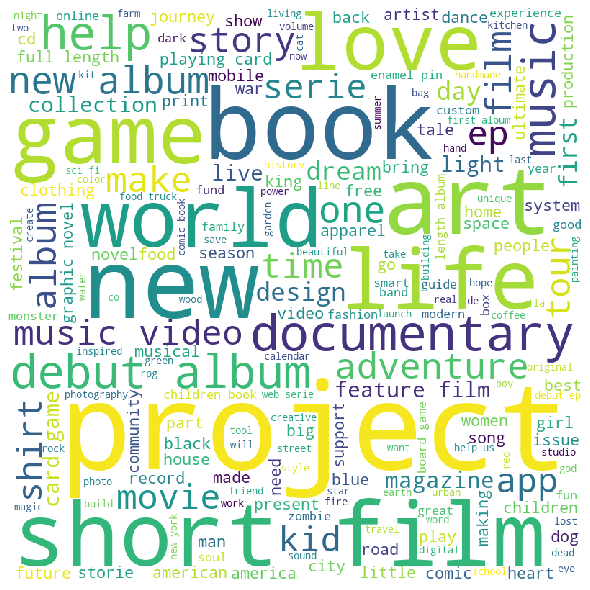

In [31]:
#generate word cloud for all campaigns
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.name: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()
  

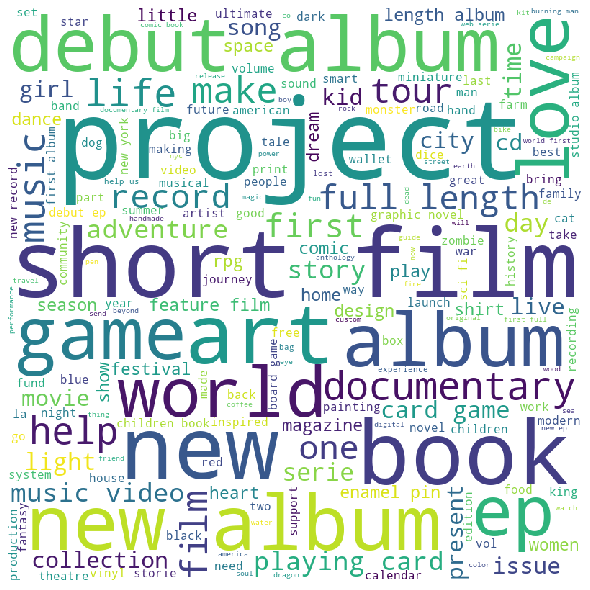

In [32]:
#wordcloud for successful campaigns
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in success_df.name: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  

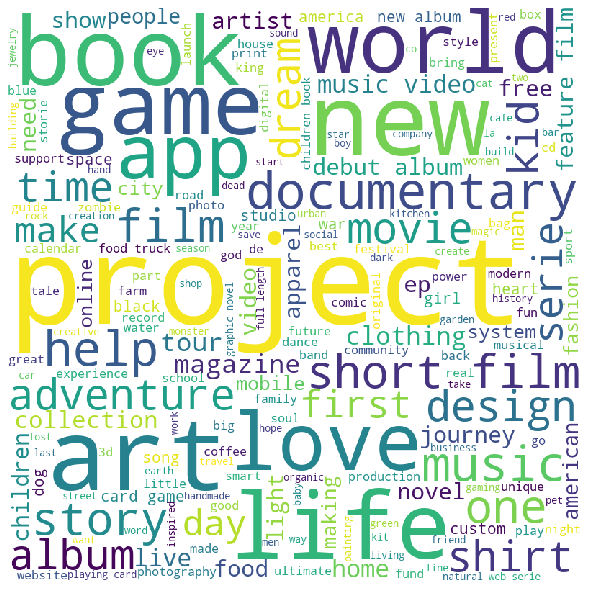

In [33]:
#wordcloud for failed campaigns
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in fail_df.name: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  

In [34]:
#word frequency in campaigns
#split campaign names into lists and convert to lower case
clean_df['name']=clean_df['name'].apply(str)
cn = clean_df['name']
words_in_name = [word.lower().split() for word in cn]
words_in_name[:1]
# List of all words in campaign names
all_words = list(itertools.chain(*words_in_name))
# Create counter
word_counts = collections.Counter(all_words)
#most common words and their count
word_counts.most_common(15)
#set stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
list(stop_words)[0:10]
#remove stop words from campaign names to focus in on meaningful words
words_new = [[word for word in words if not word in stop_words]
              for words in words_in_name]
#combine all words from campaign names into one list to gauge frequency
all_words_new = list(itertools.chain(*words_new))
counts_new = collections.Counter(all_words_new)
counts_new.most_common(15)

[('-', 47101),
 ('&', 15673),
 ('new', 12156),
 ('album', 9351),
 ('film', 9319),
 ('project', 8948),
 ('book', 7722),
 ('art', 6682),
 ('game', 6637),
 ('music', 5973),
 ('first', 5553),
 ('help', 5474),
 ('short', 4656),
 ('debut', 4361),
 ('documentary', 3499)]

In [35]:
#word frequency in successful campaigns
#split campaign names into lists and convert to lower case
success_df['name']=success_df['name'].apply(str)
sn = success_df['name']
words_success = [word.lower().split() for word in cn]
words_success[:1]
#remove stop words from campaign names to focus in on meaningful words
stop_words = set(stopwords.words('english'))
s_words = [[word for word in words if not word in stop_words]
              for words in words_success]

#combine all words from campaign names into one list to gauge frequency
success_words_new = list(itertools.chain(*words_success))
success_counts_new = collections.Counter(success_words_new)
success_counts_new.most_common(15)

[('the', 89822),
 ('-', 47101),
 ('a', 44200),
 ('of', 33071),
 ('and', 22309),
 ('for', 20821),
 ('to', 18199),
 ('&', 15673),
 ('in', 15593),
 ('new', 12156),
 ('album', 9351),
 ('film', 9319),
 ('project', 8948),
 ('by', 8858),
 ('your', 7989)]

In [36]:
#word frequency in failed campaigns
#split campaign names into lists and convert to lower case
fail_df['name']=fail_df['name'].apply(str)
fn = fail_df['name']
words_fail = [word.lower().split() for word in fn]
words_fail[:1]
#remove stop words from campaign names to focus in on meaningful words
stop_words = set(stopwords.words('english'))
f_words = [[word for word in words if not word in stop_words]
              for words in words_fail]

#combine all words from campaign names into one list to gauge frequency
fail_words_new = list(itertools.chain(*words_fail))
fail_words_new = collections.Counter(fail_words_new)
fail_words_new.most_common(15)

[('the', 50593),
 ('-', 25293),
 ('a', 23643),
 ('of', 19055),
 ('and', 13446),
 ('for', 12677),
 ('to', 11009),
 ('in', 8891),
 ('&', 8453),
 ('new', 5477),
 ('project', 5366),
 ('your', 5031),
 ('with', 4505),
 ('book', 4289),
 ('film', 4137)]

Many of the same words appear in word clouds for both successful campaigns and failed campaigns. It doesn't seem like there any particular words that will possibly predict success. Maybe shorter, concise titles help to predict success?

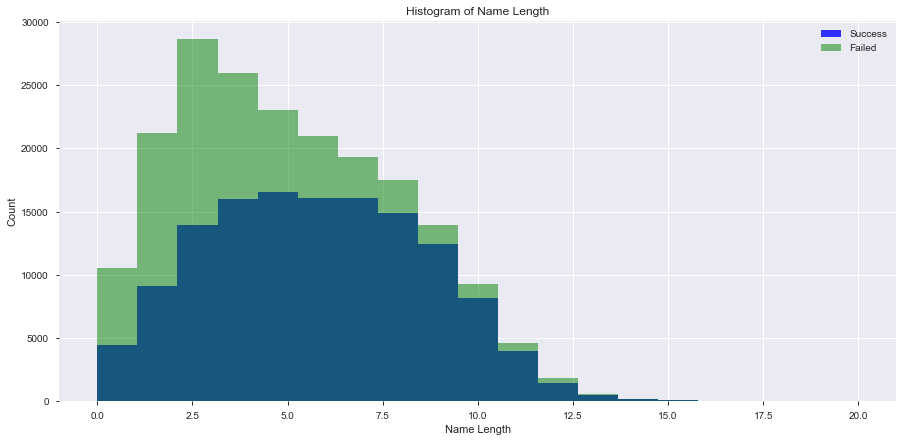

Success Descriptive Statistics
count    133851.000000
mean          6.013059
std           2.704427
min           1.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          27.000000
Name: name_len, dtype: float64

Failed Descriptive Statistics
count    197611.000000
mean          5.372479
std           2.763098
min           1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          29.000000
Name: name_len, dtype: float64


In [37]:
#name length analysis - number of words in a campaign
f, ax =plt.subplots(figsize=(15,7))
x = clean_df['name_len'].loc[clean_df['state'] == 'successful']
y = clean_df['name_len'].loc[clean_df['state'] == 'failed']
bins = np.linspace(0, 20, 20)

plt.hist(x, bins=bins, alpha=0.8, label='Success', color = 'blue')
plt.hist(y, bins=bins, alpha=0.5, label='Failed', color = 'green')
plt.legend(loc='upper right')
ax.set(ylabel="Count", xlabel = "Name Length", title = 'Histogram of Name Length')
plt.show()

#name length descriptive stats
print('\033[1m' + "Success Descriptive Statistics" + '\033[0m')
print(x.describe())
print('')
print('\033[1m' + "Failed Descriptive Statistics" + '\033[0m')
print(y.describe())

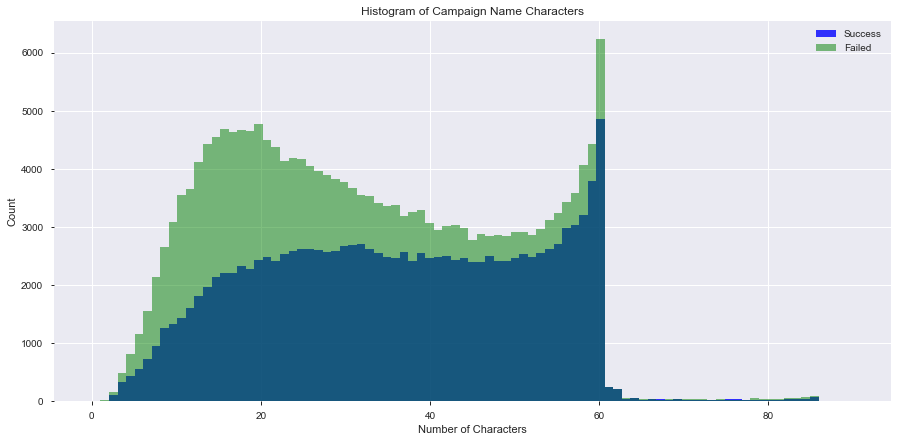

Success Descriptive Statistics
count    133851.000000
mean         36.290442
std          15.651188
min           1.000000
25%          23.000000
50%          36.000000
75%          50.000000
max          87.000000
Name: name_cl, dtype: float64

Failed Descriptive Statistics
count    197611.000000
mean         32.886727
std          16.069067
min           1.000000
25%          19.000000
50%          31.000000
75%          47.000000
max          87.000000
Name: name_cl, dtype: float64


In [38]:
#plot the number of campaign name characters compairing successful campaigns and failed campaigns
f, ax =plt.subplots(figsize=(15,7))
n = clean_df['name_cl'].loc[clean_df['state'] == 'successful']
q = clean_df['name_cl'].loc[clean_df['state'] == 'failed']
bins = np.linspace(0, 90, 90)

plt.hist(n, bins=bins, alpha=0.8, label='Success', color = 'blue')
plt.hist(q, bins=bins, alpha=0.5, label='Failed', color = 'green')
plt.legend(loc='upper right')
ax.set(ylabel="Count", xlabel = "Number of Characters", title = 'Histogram of Campaign Name Characters')
plt.show()

#descriptive stats of campaign character numbers
print('\033[1m' + "Success Descriptive Statistics" + '\033[0m')
print(n.describe())
print('')
print('\033[1m' + "Failed Descriptive Statistics" + '\033[0m')
print(q.describe())

Based on the two histograms above, it appears that successful campaigns tend to have fewer words in a campaign name and fewer characters in a campaign name then campaigns that end in failure. 

#### Research Question, Hypothesis and Statistics

<b>Research Question:</b> Is there a statistically significant relationship between the number of words in a campaign name and the campaign outcome?
<p>
<b>H0:</b> The distributions of number of words in a successful campaign is the same as the distribution of number of words in a failed campaign.

In [39]:
#normality test
data_nl = clean_df.name_len
print('\033[1m' + "Descriptive Stats" + '\033[0m')
print(data_nl.describe())
#calculate sem & ci
print('\033[1m' + "Standard Error of Mean" + '\033[0m')
print(st.sem(data_nl))
print('\033[1m' + "Confidence Intervals" + '\033[0m')
print(st.t.interval(0.95, len(data_nl)-1, loc=np.mean(data_nl), scale=st.sem(data_nl)))
# normality test
stat, p = shapiro(data_nl)
print('\033[1m' + "Shapiro Test" + '\033[0m')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Descriptive Stats
count    331462.000000
mean          5.631158
std           2.757524
min           1.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          29.000000
Name: name_len, dtype: float64
Standard Error of Mean
0.004789635505313476
Confidence Intervals
(5.621770775455233, 5.6405458701934394)
Shapiro Test
Statistics=0.966, p=0.000
Sample does not look Gaussian (reject H0)


/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [40]:
# Kruskal-Wallis H-test
# compare distributions
stat, p = kruskal(x, y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=4704.860, p=0.000
Different distributions (reject H0)


In [41]:
#bootstrap analysis on the mean of number of words in campaign name
x = clean_df['name_len'].loc[clean_df['state'] == 'successful']
y = clean_df['name_len'].loc[clean_df['state'] == 'failed']
N_rep = 5000
success_nl_mean = np.empty(N_rep)
failed_nl_mean = np.empty(N_rep)

for i in range(N_rep):
    success_nl_mean[i] = np.mean(np.random.choice(x, size=len(x)))
    failed_nl_mean[i] = np.mean(np.random.choice(y, size=len(y)))
    
mean_diff_nl = failed_nl_mean - success_nl_mean

In [42]:
p_value = np.sum(mean_diff_nl < 0) / N_rep
print(p_value)

1.0


The H0 is rejected because there does appear to be differences in the distribution of successful campaign name length and failed campaign name length. Based on the bootstrap analysis comparing the means of these two groups it appears that the means of successful campaign name length and failed campaign name length are different. 

<b>Research Question:</b> Is there a statistically significant relationship between the number of characters in a campaign name and the campaign outcome?
<p>
<b>H0:</b> The distribution of number of characters in a successful campaign name is the same as the distribution of numbers of characters in a failed campaign.

In [43]:
#normality test
# generate univariate observations
data_cl = clean_df['name_cl']
print('\033[1m' + "Descriptive Stats" + '\033[0m')
print(data_cl.describe())
#calculate sem & ci
print('\033[1m' + "Standard Error of Mean" + '\033[0m')
print(st.sem(data_cl))
print('\033[1m' + "Confidence Intervals" + '\033[0m')
print(st.t.interval(0.95, len(data_cl)-1, loc=np.mean(data_cl), scale=st.sem(data_cl)))
# normality test
stat, p = shapiro(data_cl)
print('\033[1m' + "Shapiro Test" + '\033[0m')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Descriptive Stats
count    331462.000000
mean         34.261215
std          15.989077
min           1.000000
25%          21.000000
50%          33.000000
75%          48.000000
max          87.000000
Name: name_cl, dtype: float64
Standard Error of Mean
0.02777196002530174
Confidence Intervals
(34.20678322341801, 34.315647703807436)
Shapiro Test
Statistics=0.963, p=0.000
Sample does not look Gaussian (reject H0)


In [44]:
# Kruskal-Wallis H-test
# compare distributions
stat, p = kruskal(n, q)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=3755.170, p=0.000
Different distributions (reject H0)


In [45]:
#bootstrap analysis on the mean of number of characters in campaign name
n = clean_df['name_cl'].loc[clean_df['state'] == 'successful']
q = clean_df['name_cl'].loc[clean_df['state'] == 'failed']
N_rep = 5000
success_cl_mean = np.empty(N_rep)
failed_cl_mean = np.empty(N_rep)

for i in range(N_rep):
    success_cl_mean[i] = np.mean(np.random.choice(n, size=len(n)))
    failed_cl_mean[i] = np.mean(np.random.choice(q, size=len(q)))
    
mean_diff_cl = failed_cl_mean - success_cl_mean

In [46]:
p_value = np.sum(mean_diff_cl < 0) / N_rep
print(p_value)

1.0


The H0 is rejected because there does appear to be differences in the distribution of successful campaign character length and failed campaign character length. Based on the bootstrap analysis comparing the means of these two groups it appears that the means of successful campaign character length and failed campaign character length are different. 

### Main Categories

As previously stated, the ability to predict a successful Kickstarter campaign will be of huge benefit to both Kickstarter and to companies and groups who use their services to raise funds for their projects. The success of Kickstarter campaigns means continued success and profitability for the Kickstarter platform, and successful campaigns are given the opportunity to launch their innovative products and ideas - which at times maybe didn't seem possible through traditional funding. It's important to begin looking at any potential relationships between the characteristics of successful campaigns and unsuccessful campaigns. What differentiates them? Is it enough to just put a project on Kickstarter and see what happens, or are there outside factors that need to be taken into account or at least discussed? 

In [47]:
#Identify the top ten main campaign categories 
clean_df['main_category'].value_counts().head(30)

Film & Video    56503
Music           45801
Publishing      35413
Games           28520
Technology      27046
Art             25640
Design          25363
Food            22054
Fashion         19774
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4148
Dance            3573
Name: main_category, dtype: int64

Visually, this chart represents what we know to be true about the data at first glance. This ranking is based off of the number of campaigns in each category. The top 10 main categories do not increase drastically between Fashion and Games, however there is an identified steep increase from Theater to Fashion, and from Publishing to both Music and Film & Video. The top ten main categories are calculated from the sum of campaigns that fall under each category.

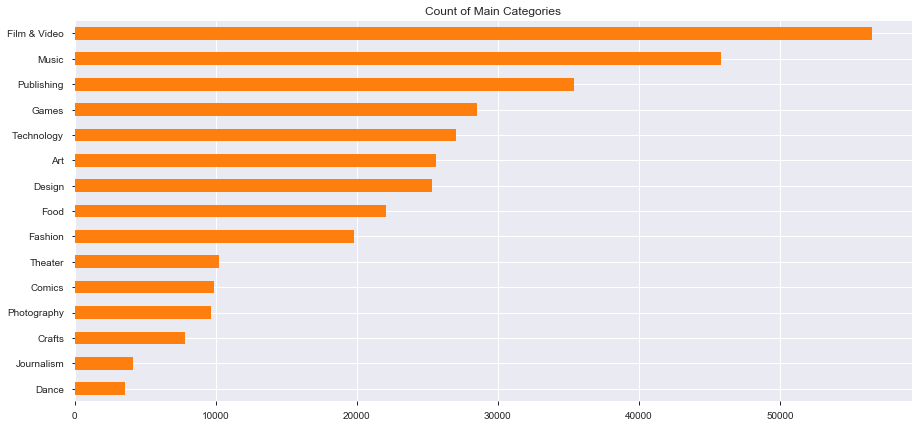

In [48]:
#Visualize the top ten main kickstarter campaign categories, based on count of campaigns in each category
clean_df.main_category.value_counts()[:30].sort_values().plot(kind='barh', title='Count of Main Categories', color = 'tab:orange',figsize=(15, 7))

Intrestingly, when we look at the top 10 main categories based on the sum of pledged USD, the data provides interesting insight. Although games are the 4th ranked main category in terms of number of campaigns, it far out paces Film & Video. Campaigns with the main category games brought in \\$741,321,067 in pledges alone from 35,231 campaigns. For Kickstarter, this accounts to a \\$37,066,053.35 profit from the successful Game campaigns, not accounting for additional fees collected at the time of each pledge - that's a lot of money! 
Design is not far behind Games, bringing in \\$734,215,606 in pledges for 30,070 games.
This seems to be related to the amount of money needed to fund campaigns for categories such as Games and Technology.

In [49]:
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
usd_main = clean_df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending = False)
print(usd_main)

main_category
Games           715062392
Design          705221712
Technology      645802498
Film & Video    379513169
Music           190777264
Publishing      130755927
Fashion         125676176
Food            122779551
Art              89075714
Comics           70598884
Theater          42660798
Photography      37708728
Crafts           13952984
Dance            12907799
Journalism       12194691
Name: usd_pledged_real, dtype: int64


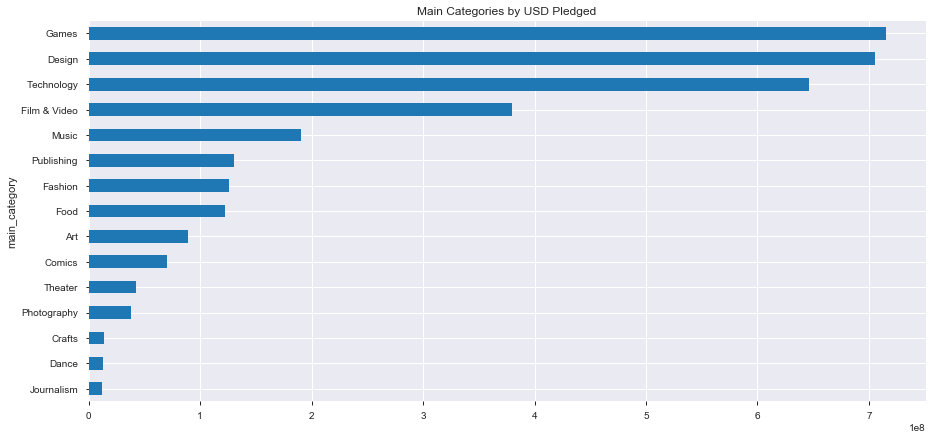

In [50]:
#top 10 campaign categories by total sum of money pledged
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
clean_df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending = True).plot(kind='barh', title='Main Categories by USD Pledged', color = 'tab:blue',figsize=(15, 7))

It is not surprising to see that for each category, successful campaigns were the most lucrative. Failed campaigns appear to be the second most lucrative campaign state, while live, suspended and undefined have the lowest pledge amounts.

In [51]:
#top 10 campaign categories by total sum of money pledged for each campaign state
clean_df.usd_pledged_real = clean_df.usd_pledged_real.astype(int)
camp_df = clean_df.groupby(['main_category','state'])['usd_pledged_real'].sum().sort_index(ascending = False).reset_index()
camp_df

,main_category,state,usd_pledged_real
0,Theater,successful,39027485
1,Theater,failed,3633313
2,Technology,successful,596149844
3,Technology,failed,49652654
4,Publishing,successful,116072212
5,Publishing,failed,14683715
6,Photography,successful,33418618
7,Photography,failed,4290110
8,Music,successful,177143132
9,Music,failed,13634132


After determining breaking down the main categories by the campaign state, we were able to find both the pledge amount by campaign state in each main category (as shown above), and the total number of campaigns by state in each main category. In the future, we will compare the success and failure rates of each campaign main category to help determine main categories at a higher financial risk.

In [52]:
# a look at the status of campaigns based on their main category
# do certain campaign categories have a higher failure rate than others?
main_state = clean_df.groupby('main_category')['state'].value_counts()
print(main_state)


main_category  state     
Art            failed        14130
               successful    11510
Comics         successful     5842
               failed         4036
Crafts         failed         5703
               successful     2115
Dance          successful     2338
               failed         1235
Design         failed        14814
               successful    10549
Fashion        failed        14181
               successful     5593
Film & Video   failed        32891
               successful    23612
Food           failed        15969
               successful     6085
Games          failed        16002
               successful    12518
Journalism     failed         3136
               successful     1012
Music          successful    24105
               failed        21696
Photography    failed         6384
               successful     3305
Publishing     failed        23113
               successful    12300
Technology     failed        20613
               successful    

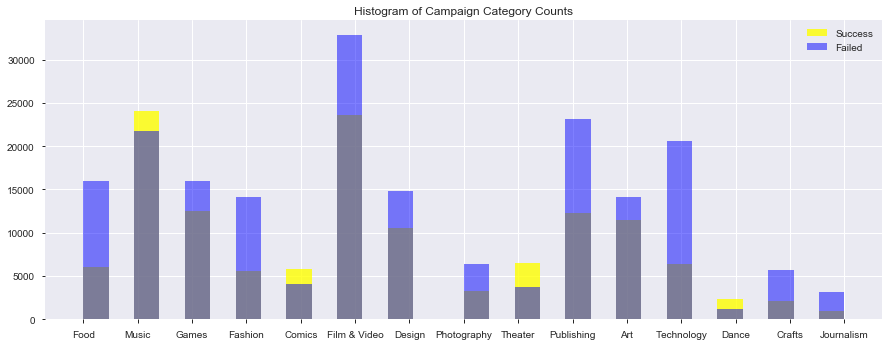

In [53]:
#campaign category counts by campaign state
x = clean_df['main_category'].loc[clean_df['state'] == 'successful']
y = clean_df['main_category'].loc[clean_df['state'] == 'failed']
fig =plt.figure(figsize=(15,5.5))

plt.hist(x, bins = 30, alpha=0.8, label='Success', color = 'yellow')
plt.hist(y, bins = 30, alpha=0.5, label='Failed', color = 'blue')
plt.legend(loc='upper right')
plt.title('Histogram of Campaign Category Counts')
plt.show()

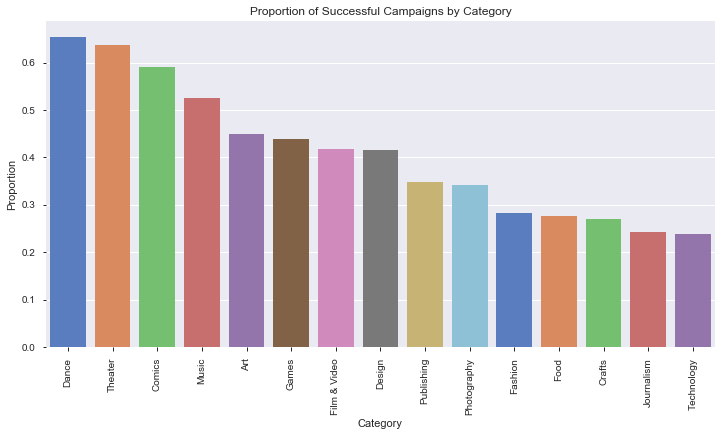

Dance           0.654352
Theater         0.637961
Comics          0.591415
Music           0.526299
Art             0.448908
Games           0.438920
Film & Video    0.417889
Design          0.415921
Publishing      0.347330
Photography     0.341108
Fashion         0.282846
Food            0.275914
Crafts          0.270530
Journalism      0.243973
Technology      0.237854
Name: main_category, dtype: float64


In [54]:
#portion successful campaign categories
y = (clean_df['main_category'].loc[clean_df['state'] == 'successful'].value_counts())/(clean_df['main_category'].value_counts())
y = y.sort_values(ascending = False)
fig=plt.figure(figsize=(12, 6))
locs,labels = plt.xticks()
plt.setp(labels, rotation=90)
ax = sns.barplot(x = y.index, y = y, order = y.index, palette = 'muted')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.title('Proportion of Successful Campaigns by Category')
plt.show()
print(y)

#### Research Question, Hypothesis and Statistics

<b>Research Question:</b> Is there a statistically significant relationship between the campaign category and campaign outcomes?
<p>
<b>H0:</b> There is a no difference in successful campaign category distributions and failed campaign category distributions.

The variables being investigated are both categorical. Because of this, we use a stacked histogram and chi-square to determine whether there is any significant relationship between campaign category and campaign success.

In [55]:
test = clean_df.groupby(['main_category','state']).mean().sort_index(ascending = False).reset_index()
test.mean()

ID                      1.073398e+09
goal                    3.282699e+04
pledged                 1.255880e+04
backers                 1.332252e+02
usd_pledged_real        1.169342e+04
usd_goal_real           3.084706e+04
name_cl                 3.496199e+01
name_len                5.691177e+00
main_category_encode    7.000000e+00
binary_state            5.000000e-01
dtype: float64

In [56]:
cat_state_table = pd.crosstab(index=clean_df["main_category"], 
                          columns=clean_df["state"])

cat_state_table

state,failed,successful
main_category,,
Art,14130,11510
Comics,4036,5842
Crafts,5703,2115
Dance,1235,2338
Design,14814,10549
Fashion,14181,5593
Film & Video,32891,23612
Food,15969,6085
Games,16002,12518


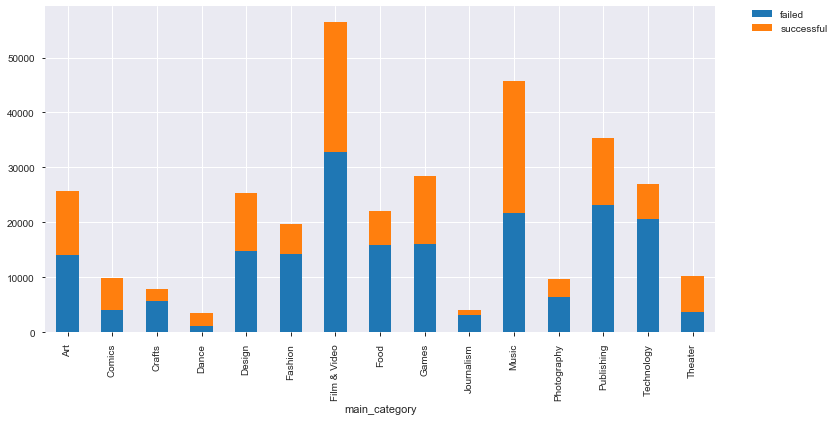

In [57]:
#campaign outcomes by main category
cat_state_table.plot(kind="bar", 
                 figsize=(12,6),
                 stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [58]:
#normality test
data_cat = cat_state_table
print('\033[1m' + "Descriptive Stats" + '\033[0m')
print(data_cat.describe())
#calculate sem & ci
print('\033[1m' + "Standard Error of Mean" + '\033[0m')
print(st.sem(data_cat))
print('\033[1m' + "Confidence Intervals" + '\033[0m')
print(st.t.interval(0.95, len(data_cat)-1, loc=np.mean(data_cat), scale=st.sem(data_cat)))
# normality test
stat, p = shapiro(data_cat)
print('\033[1m' + "Shapiro Test" + '\033[0m')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Descriptive Stats
state        failed    successful
count     15.000000     15.000000
mean   13174.066667   8923.400000
std     9080.054731   7092.876213
min     1235.000000   1012.000000
25%     4869.500000   4449.000000
50%    14181.000000   6433.000000
75%    18307.500000  11905.000000
max    32891.000000  24105.000000
Standard Error of Mean
[2344.46005047 1831.37276328]
Confidence Intervals
(array([8145.69996006, 4995.4960767 ]), array([18202.43337327, 12851.3039233 ]))
Shapiro Test
Statistics=0.911, p=0.015
Sample does not look Gaussian (reject H0)


In [59]:
#Chi-Squared Test
table = cat_state_table
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


stat=15425.822, p=0.000
Probably dependent


This p-value is <.001 - due to the size of the chi square statistic and p-value, it appears that the campaign category does have a significant relationship with the outcome of a campaign.

### Campaign Goals

An overview of the Kickstarter campaign campaigns seek funding ranging anywhere from \\$0 to \\$20,000,000, however the average campaign goal is \\$49080. With conversions for different currencies already taken into account, total pledges for campaigns range anywhere from $0 to a high of \\$20,338,986. On average, campaigns end up raising \\$9058 total funding regardless of their eventual success or failure.


In [60]:
#explore the campaign goal data by identifying min/max/mean
goal_max = clean_df['goal'].max()
goal_min = clean_df['goal'].min()
goal_mean = clean_df['goal'].mean()
print('Campaign goal amounts range from $', goal_min, ' to $', goal_max,'.', 'The average campaign goal is $', goal_mean)
#explore the campaign goal data by identifying min/max/mean
pledge_max = clean_df['usd_pledged_real'].max()
pledge_min = clean_df['usd_pledged_real'].min()
pledge_mean = clean_df['usd_pledged_real'].mean()
print('Campaign pledge amounts range from $', pledge_min, ' to $', pledge_max,'.', 'The average pledge amount is $', pledge_mean)

Campaign goal amounts range from $ 0.01  to $ 100000000.0 . The average campaign goal is $ 44265.8254486185
Campaign pledge amounts range from $ 0  to $ 20338986 . The average pledge amount is $ 9939.867275886829


In [61]:
#create a new column to show the proportion of final campaign pledged to the original campaign goal
clean_df['goal_prop'] = clean_df['usd_pledged_real'] / clean_df['usd_goal_real']
clean_df.goal_prop.head()

0    0.000000
1    0.080700
2    0.004889
3    0.000200
5    1.047500
Name: goal_prop, dtype: float64

#### Research Question, Hypothesis and Statistics

<b>Research Question:</b> Is there is a statistically significant relationship between campaign goals and the outcome of a campaign?
<p>
<b>H0:</b> The distribution of campaign goals for failed campaigns is different than the distribution of campaign goals for successful campaigns.

In [62]:
#test for normal distribution
# generate univariate observations
data_goal = clean_df['usd_goal_real']
print('\033[1m' + "Descriptive Stats" + '\033[0m')
print(data_goal.describe())
#calculate sem & ci
print('\033[1m' + "Standard Error of Mean" + '\033[0m')
print(st.sem(data_goal))
print('\033[1m' + "Confidence Intervals" + '\033[0m')
print(st.t.interval(0.95, len(data_goal)-1, loc=np.mean(data_goal), scale=st.sem(data_goal)))
# normality test
stat, p = shapiro(data_goal)
print('\033[1m' + "Shapiro Test" + '\033[0m')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Descriptive Stats
count    3.314620e+05
mean     4.152286e+04
std      1.109279e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64
Standard Error of Mean
1926.7430780662376
Confidence Intervals
(37746.49455398775, 45299.216214486936)
Shapiro Test
Statistics=0.010, p=0.000
Sample does not look Gaussian (reject H0)


/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


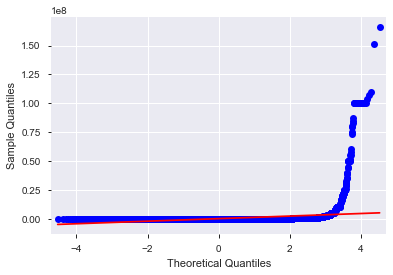

In [63]:
#use quantile-quantile plot to test for normal distribution
qqplot(clean_df.usd_goal_real, line='s')
plt.show()

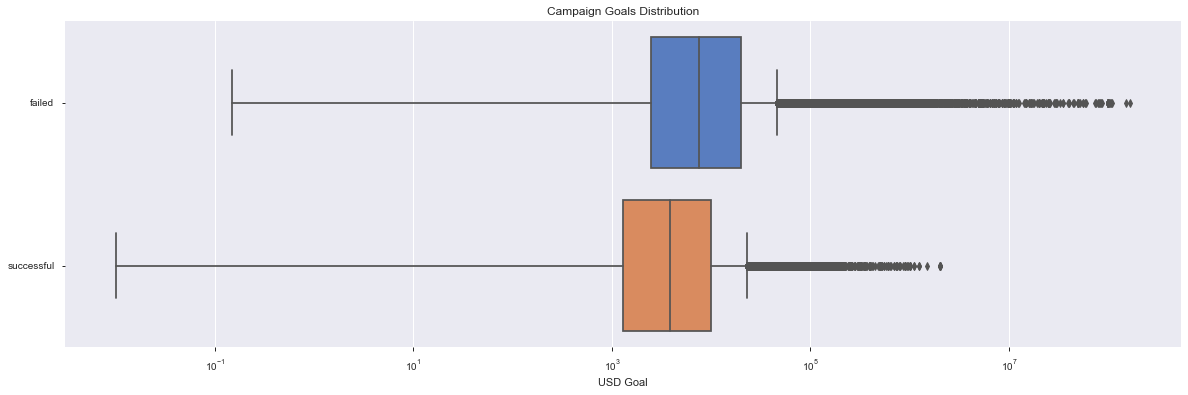

In [64]:
#use a box plot to test for normal distribution of campaign goals across campaign states
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="usd_goal_real", y = 'state', data=clean_df, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "USD Goal", title = 'Campaign Goals Distribution')
plt.show()

In [65]:
# Kruskal-Wallis H-test
# compare samples
goal_s= clean_df['usd_goal_real'].loc[clean_df['state'] == 'successful']
goal_f = clean_df['usd_goal_real'].loc[clean_df['state'] == 'failed']
stat, p = kruskal(goal_s, goal_f)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=16315.582, p=0.000
Different distributions (reject H0)


In [66]:
#bootstrap analysis on campaign goals
N_rep = 5000
success_goal_mean = np.empty(N_rep)
failed_goal_mean = np.empty(N_rep)

for i in range(N_rep):
    success_goal_mean[i] = np.mean(np.random.choice(goal_s, size=len(goal_s)))
    failed_goal_mean[i] = np.mean(np.random.choice(goal_f, size=len(goal_f)))
    
mean_diff_goal = failed_goal_mean - success_goal_mean

In [67]:
p_value = np.sum(mean_diff_goal < 0) / N_rep
print(p_value)

0.0


The H0 is rejected because the distributions of failed campaign goals is different than the distribution of successful campaign goals. However, a bootstrap analysis compares the means and finds a p-value of <.001 - it's possible that the means of the distributions are similar.

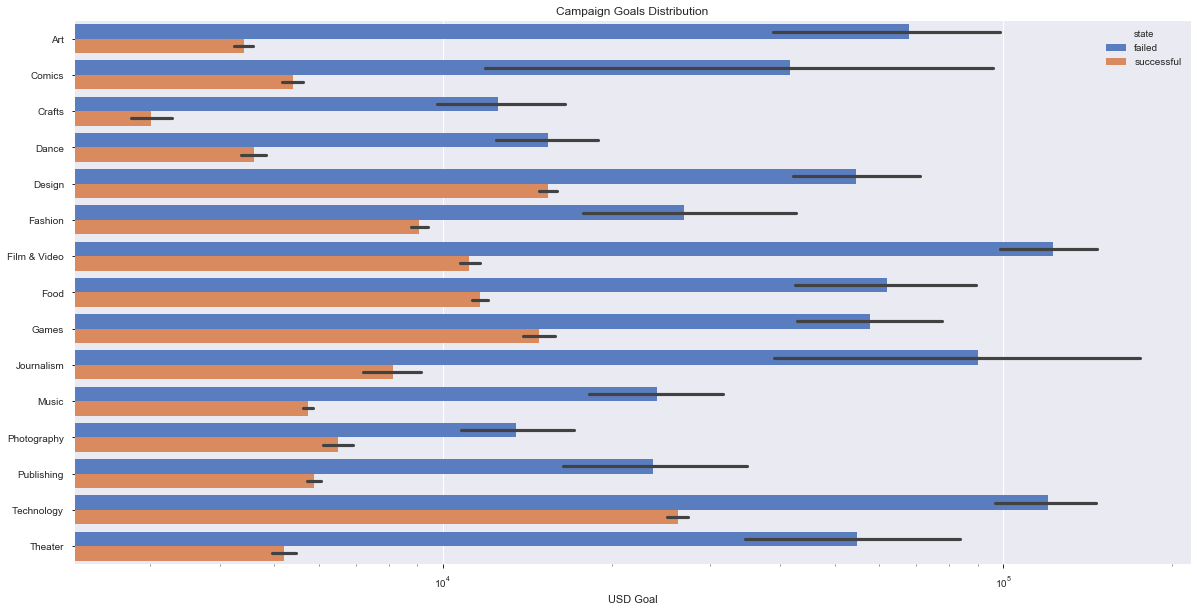

In [68]:
#use a histogram to examine distribution of campaign goals by main category, by campaign state
f, ax = plt.subplots(figsize=(20, 10))
ax.set_xscale("log")
sns.barplot(x="usd_goal_real", y = 'main_category', hue = 'state', data=clean_df, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "USD Goal", title = 'Campaign Goals Distribution')
plt.show()

### Campaign Duration

After exploring some of the campaign data, it is important to add a column that shows the duration of a campaign to contextualize how much time it has taken for successful campaigns to reach or surpass their funding goal, or for determining the average length of time of a failed campaign. In order to create a campaign duration column, both the launched and deadline columns are converted to datetime. From there, the campaign_duration column is created and added to clean_df by calculating the difference between launched and deadline. 
Exploration of this new column shows that the minimum campaign duration is only 7 hours and 17 minutes, while the longest campaign duration was 16738 days. Campaigns typically run for an average length of time of 33 days.


In [69]:
#convert the launched date and deadline date to datetime, solve for the duration between the launch date and 
#deadline - drop the hr:mm:ss from the analysis
#sort for the top 10 campaign durations
#create a factorplot for campaign duration, state of campaign, and amount pledged
print(clean_df['campaign_duration'].head(10))
dur_min=clean_df['campaign_duration'].min()
dur_max=clean_df['campaign_duration'].max()
dur_mean=clean_df['campaign_duration'].mean()
print('The shortest campaign duration was',dur_min, ',',' the longest campaign duration was',dur_max,
      '.          The average campaign duration was ',dur_mean)

0    59 days
1    60 days
2    45 days
3    30 days
5    35 days
6    20 days
7    45 days
10   30 days
11   30 days
12   30 days
Name: campaign_duration, dtype: timedelta64[ns]
The shortest campaign duration was 1 days 00:00:00 ,  the longest campaign duration was 92 days 00:00:00 .          The average campaign duration was  33 days 22:56:30.665596


In [70]:
#successful campaign duration
#redo datetime for success_df
success_df['launched'] = pd.to_datetime(success_df['launched']).dt.date
success_df['deadline'] = pd.to_datetime(success_df['deadline']).dt.date
success_df['campaign_duration'] = success_df['deadline'] - success_df['launched']
duration_min = success_df['campaign_duration'].min()
duration_max = success_df['campaign_duration'].max()
duration_mean = success_df['campaign_duration'].mean()
print(duration_min, duration_max, duration_mean)

1 days 00:00:00 92 days 00:00:00 32 days 03:45:40.524912


In [71]:
#failed campaign duration
#redo datetime for success_df
fail_df['launched'] = pd.to_datetime(fail_df['launched']).dt.date
fail_df['deadline'] = pd.to_datetime(fail_df['deadline']).dt.date
fail_df['campaign_duration'] = fail_df['deadline'] - fail_df['launched']
fduration_min = fail_df['campaign_duration'].min()
fduration_max = fail_df['campaign_duration'].max()
fduration_mean = fail_df['campaign_duration'].mean()
print(fduration_min, fduration_max, fduration_mean)

1 days 00:00:00 92 days 00:00:00 35 days 04:11:24.180536


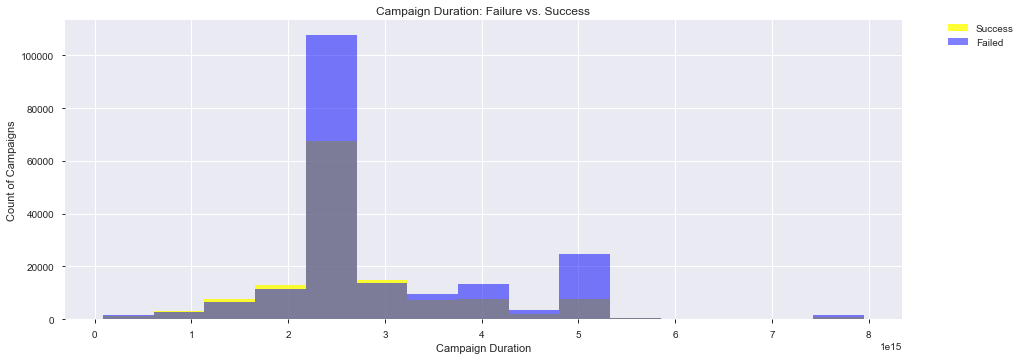

In [72]:
#campaign duration by campaign state
clean_df['campaign_duration'] = pd.to_numeric(clean_df['campaign_duration'], errors='coerce')
x = clean_df['campaign_duration'].loc[clean_df['state'] == 'successful']
y = clean_df['campaign_duration'].loc[clean_df['state'] == 'failed']
fig =plt.figure(figsize=(15,5.5))

plt.hist(x, bins = 15, alpha=0.8, label='Success', color = 'yellow')
plt.hist(y, bins = 15, alpha=0.5, label='Failed', color = 'blue')
plt.legend(loc='upper right')
plt.title('Campaign Duration: Failure vs. Success')
plt.xlabel('Campaign Duration')
plt.ylabel('Count of Campaigns')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

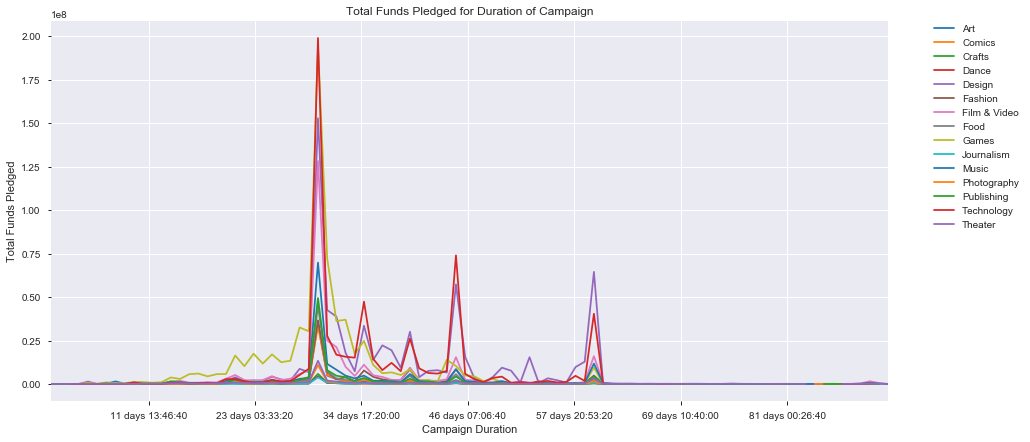

In [73]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
success_df.groupby(['campaign_duration','main_category']).sum()['usd_pledged_real'].unstack().plot(ax=ax)
plt.xlabel('Campaign Duration')
plt.ylabel('Total Funds Pledged')
plt.title('Total Funds Pledged for Duration of Campaign')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

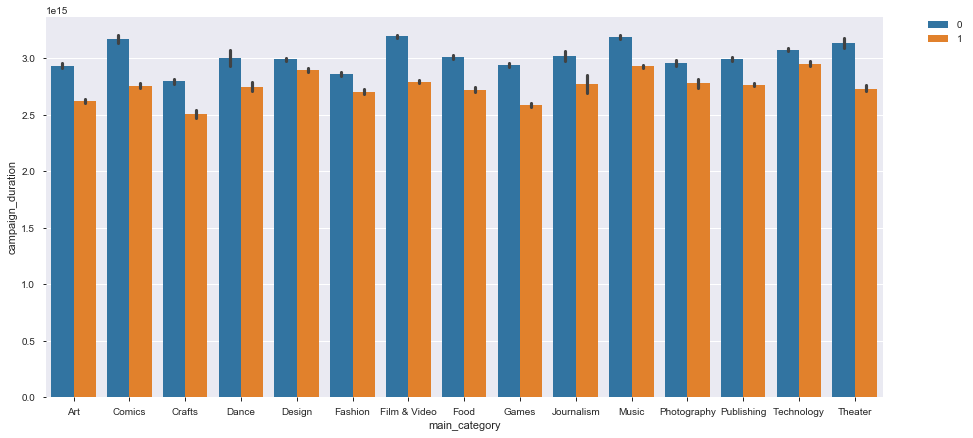

In [74]:
#a look at campaign duration of failed and successful campaigns
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='main_category', y='campaign_duration', hue ="binary_state",  data = clean_df, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Research Question, Hypothesis and Statistics

<b>Research Question:</b>Is there a statistically significant relationship between the duration of a campaign and campaign outcome?
<p>
<b>H0:</b> The distribution of successful campaign durations is the same as the distribution of failed campaign durations.

In [75]:
# generate univariate observations
data_camp = clean_df['campaign_duration']
print('\033[1m' + "Descriptive Stats" + '\033[0m')
print(data_camp.describe())
#calculate sem & ci
print('\033[1m' + "Standard Error of Mean" + '\033[0m')
print(st.sem(data_camp))
print('\033[1m' + "Confidence Intervals" + '\033[0m')
print(st.t.interval(0.95, len(data_camp)-1, loc=np.mean(data_camp), scale=st.sem(data_camp)))
# normality test
stat, p = shapiro(data_camp)
print('\033[1m' + "Shapiro Test" + '\033[0m')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Descriptive Stats
count    3.314620e+05
mean     2.933791e+15
std      1.098495e+15
min      8.640000e+13
25%      2.592000e+15
50%      2.592000e+15
75%      3.110400e+15
max      7.948800e+15
Name: campaign_duration, dtype: float64
Standard Error of Mean
1908013116787.4346
Confidence Intervals
(2930051014950076.0, 2937530316243396.0)
Shapiro Test
Statistics=0.831, p=0.000
Sample does not look Gaussian (reject H0)


/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


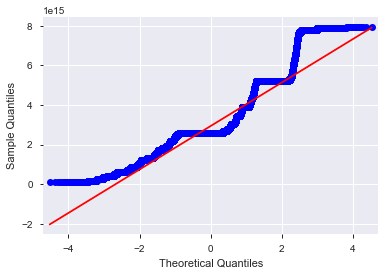

In [76]:
#use quantile-quantile plot to test for normal distribution
qqplot(clean_df.campaign_duration, line='s')
plt.show()

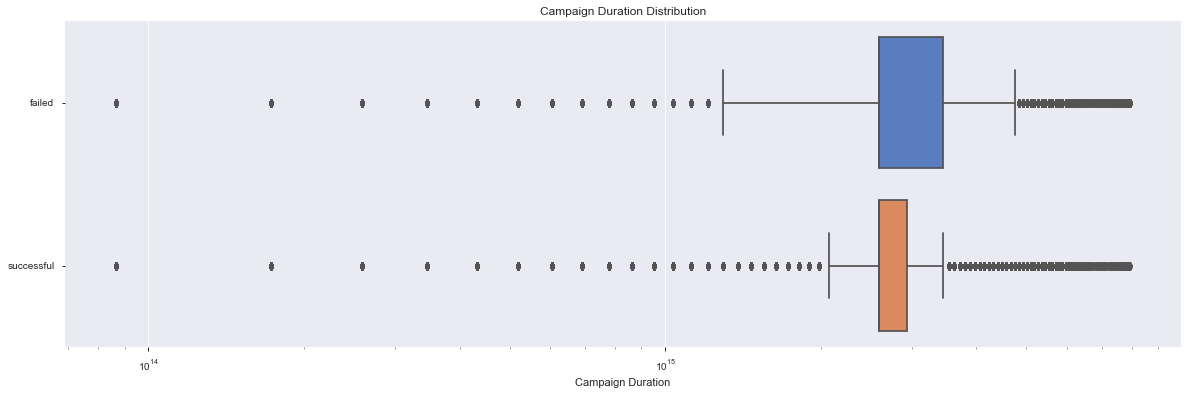

In [77]:
#use box whisker plot to test for normal distribution of campaign goals across all campaign states
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="campaign_duration", y = 'state', data=clean_df, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "Campaign Duration", title = 'Campaign Duration Distribution')
plt.show()

In [78]:
#kruskal-Wallis test non-parametric equivalent of 2 way anova
camp_s= clean_df['campaign_duration'].loc[clean_df['state'] == 'successful']
camp_f = clean_df['campaign_duration'].loc[clean_df['state'] == 'failed']
stat, p = kruskal(camp_s, camp_f)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=3046.714, p=0.000
Probably different distributions


In [79]:
#bootstrap analysis on campaign goals
N_rep = 5000
success_camp_mean = np.empty(N_rep)
failed_camp_mean = np.empty(N_rep)

for i in range(N_rep):
    success_camp_mean[i] = np.mean(np.random.choice(camp_s, size=len(camp_s)))
    failed_camp_mean[i] = np.mean(np.random.choice(camp_f, size=len(camp_f)))
    
mean_diff_camp = failed_camp_mean - success_camp_mean

In [80]:
p_value = np.sum(mean_diff_goal < 0) / N_rep
print(p_value)

0.0


The H0 is rejected. The distributions of successful campaign durations and failed campaign durations are both different, and both have different means.

### Campaign Countries of Origin

In [81]:
#count of successful campaigns per category
success_country = success_df['country'].value_counts()
print(success_country)

US    109299
GB     12067
CA      4134
AU      2010
DE       937
FR       908
NL       617
SE       509
ES       492
NZ       448
IT       439
MX       396
DK       360
HK       216
IE       207
CH       187
SG       178
NO       162
BE       152
AT       107
LU        19
JP         7
Name: country, dtype: int64


In [82]:
#count of failed campaigns per country
fail_country = fail_df['country'].value_counts()
print(fail_country)

US    152059
GB     17386
CA      8236
AU      4606
DE      2499
IT      1930
NL      1794
FR      1612
ES      1381
MX      1015
SE      1000
NZ       826
DK       566
IE       476
CH       465
NO       420
AT       378
BE       371
SG       276
HK       261
LU        38
JP        16
Name: country, dtype: int64


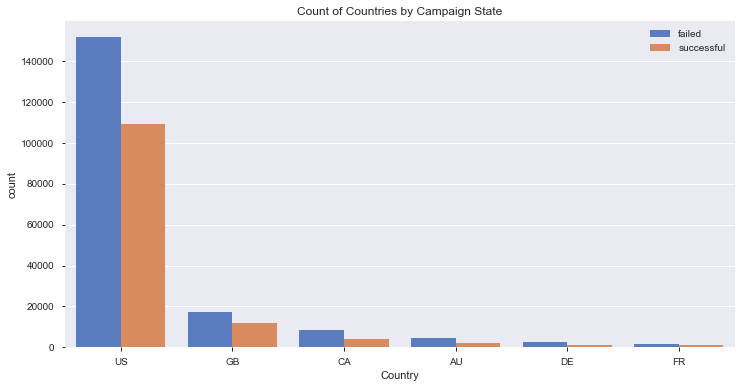

In [83]:
#count of campaigns by country and campaign state
fig = plt.figure(figsize = (12, 6))
sns.countplot(x = 'country', hue = 'state', palette = 'muted',
              data = clean_df[clean_df.country.isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR'])], 
              order = clean_df.country.loc[clean_df.country.isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR'])].value_counts().index)
plt.legend(title ='')
plt.xlabel('Country')
plt.title('Count of Countries by Campaign State')
plt.show()

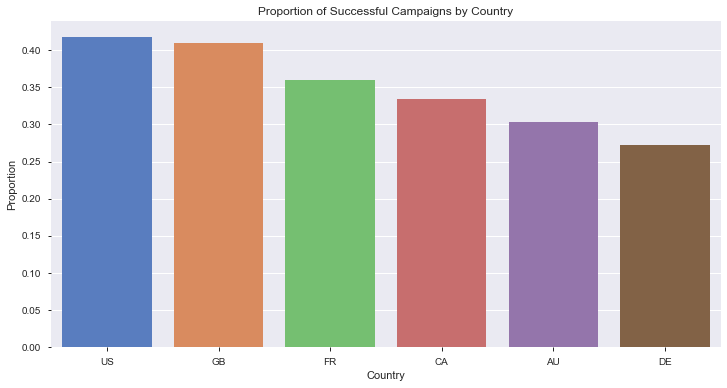

US    0.418196
GB    0.409704
FR    0.360317
CA    0.334196
AU    0.303809
DE    0.272701
Name: country, dtype: float64


In [84]:
#what portion of campaigns in each country were successful?
y = (clean_df['country'].loc[clean_df['country'].isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR',])].loc[clean_df['state'] == 'successful'].value_counts())/(clean_df['country'].loc[clean_df['country'].isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR'])].value_counts())
y = y.sort_values(ascending = False)
fig=plt.figure(figsize=(12,6))
ax = sns.barplot(x = y.index, y = y, order = y.index, palette = 'muted')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.title('Proportion of Successful Campaigns by Country')
plt.show()
print(y)

In [85]:
#group categories by main category and campaign state
grouped = clean_df.groupby(['country','state'])
grouped.size()

country  state     
AT       failed           378
         successful       107
AU       failed          4606
         successful      2010
BE       failed           371
         successful       152
CA       failed          8236
         successful      4134
CH       failed           465
         successful       187
DE       failed          2499
         successful       937
DK       failed           566
         successful       360
ES       failed          1381
         successful       492
FR       failed          1612
         successful       908
GB       failed         17386
         successful     12067
HK       failed           261
         successful       216
IE       failed           476
         successful       207
IT       failed          1930
         successful       439
JP       failed            16
         successful         7
LU       failed            38
         successful        19
MX       failed          1015
         successful       396
NL       failed     

### Campaign Backers

All campaigns have an average of 106 backers per campaign. Successful campaigns have an average of 263 backers per campaign. Failed campaigns have an average of 16 backers per campaign.

In [86]:
#average backers per campaign
cbackers = clean_df.backers.mean()
sbackers = success_df.backers.mean()
fbackers = fail_df.backers.mean()
print(cbackers, sbackers, fbackers)

116.45631475101219 264.12839650058646 16.431236115398434


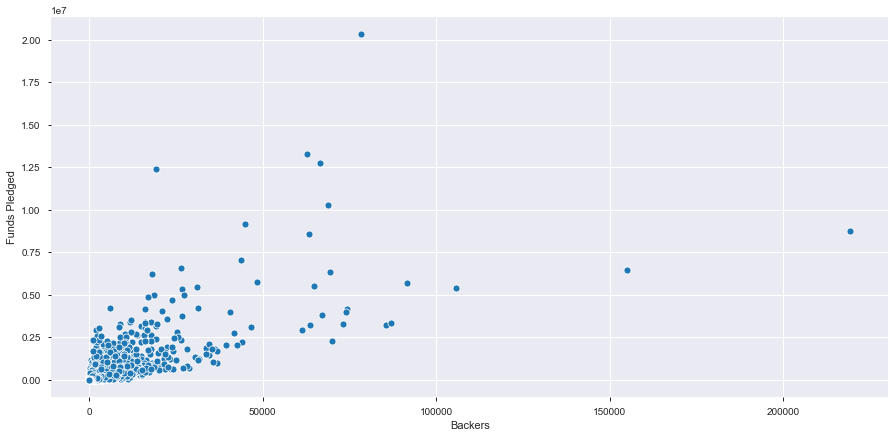

In [87]:
#number of backers and campaign pledge amounts
cam = pd.to_numeric(clean_df['backers'])
num = pd.to_numeric(clean_df['usd_pledged_real'])
fig, ax = plt.subplots(figsize=(15,7)) # define the axes so we can modify them
sns.scatterplot(cam, num,data=success_df,ax = ax) # tell sns to use ax
ax.set_xlabel('') # turn off title
ax.set_ylabel('') # turn off title
plt.xlabel('Backers')
plt.ylabel('Funds Pledged')
plt.show()

#### Research Question, Hypothesis and Statistics

<b> Research Question </b> : Is there a relationship between the number of backers per campaign and campaign success?
<p>
<b> H0:</b> The distribution of failed campaign backers is the same as the distribution of successful campaign backers.

In [88]:
# generate univariate observations
data_back = clean_df['backers']
print('\033[1m' + "Descriptive Stats" + '\033[0m')
print(data_back.describe())
#calculate sem & ci
print('\033[1m' + "Standard Error of Mean" + '\033[0m')
print(st.sem(data_back))
print('\033[1m' + "Confidence Intervals" + '\033[0m')
print(st.t.interval(0.95, len(data_back)-1, loc=np.mean(data_back), scale=st.sem(data_back)))
# normality test
stat, p = shapiro(data_back)
print('\033[1m' + "Shapiro Test" + '\033[0m')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Descriptive Stats
count    331462.000000
mean        116.456315
std         965.732911
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64
Standard Error of Mean
1.6774135955830822
Confidence Intervals
(113.16863251117475, 119.74399699084962)
Shapiro Test
Statistics=0.063, p=0.000
Sample does not look Gaussian (reject H0)


/Users/kellipeluso/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


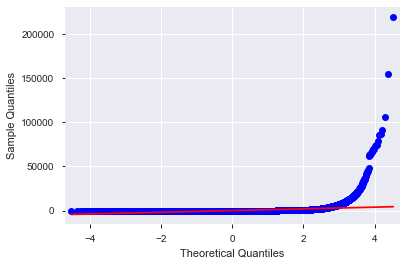

In [89]:
#use quantile-quantile plot to test for normal distribution
qqplot(clean_df.backers, line='s')
plt.show()

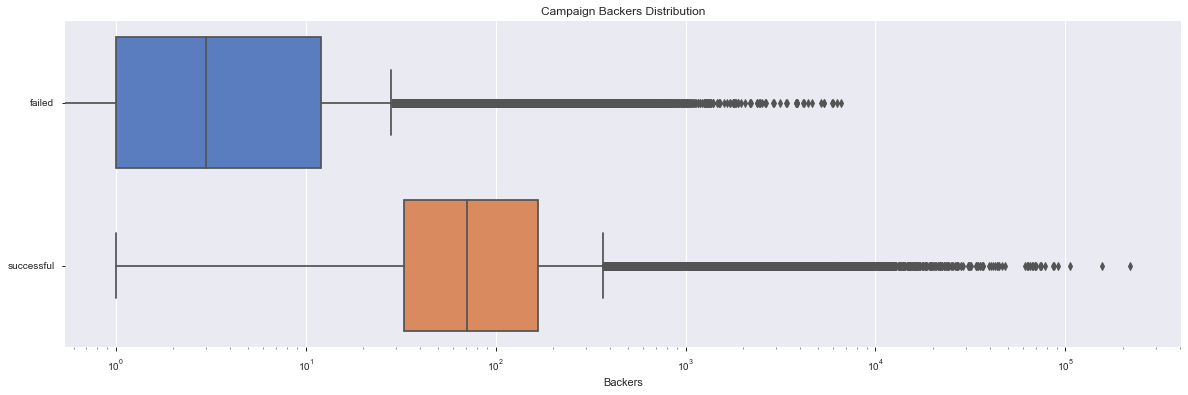

In [90]:
#box whisker plot to test for normal distribution for campaign backers 
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="backers", y = 'state', data=clean_df, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "Backers", title = 'Campaign Backers Distribution')
plt.show()

In [91]:
#kruskal-Wallis test non-parametric equivalent of 2 way anova
back_s= clean_df['backers'].loc[clean_df['state'] == 'successful']
back_f = clean_df['backers'].loc[clean_df['state'] == 'failed']
stat, p = kruskal(back_s, back_f)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=169378.627, p=0.000
Probably different distributions


In [92]:
#bootstrap analysis on campaign backers
N_rep = 5000
success_back_mean = np.empty(N_rep)
failed_back_mean = np.empty(N_rep)

for i in range(N_rep):
    success_back_mean[i] = np.mean(np.random.choice(back_s, size=len(back_s)))
    failed_back_mean[i] = np.mean(np.random.choice(back_f, size=len(back_f)))
    
mean_diff_back = failed_back_mean - success_back_mean

In [93]:
p_value = np.sum(mean_diff_back < 0) / N_rep
print(p_value)

1.0


The H0 is rejected because the distribution of successful campaign backers and failed campaign backers is different. The means of the two distributions appear to also be different.

### Correlations Matrix

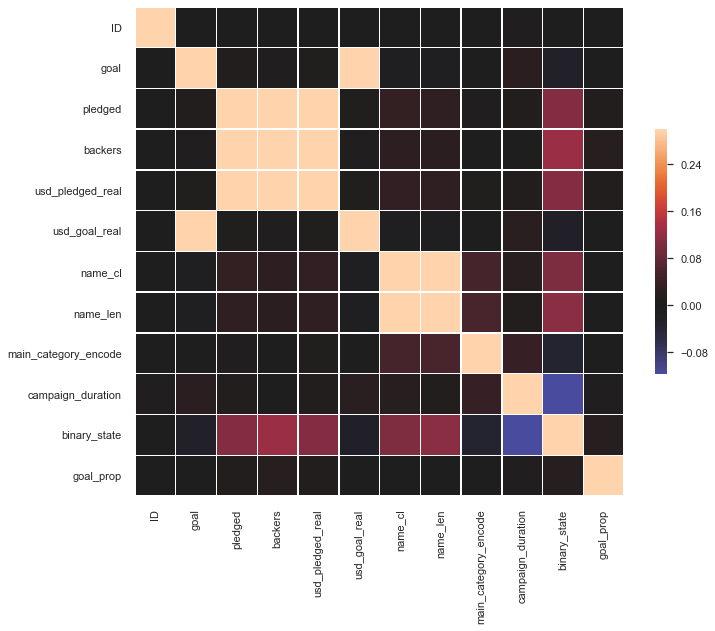

In [94]:
#plot correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = clean_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Modeling

In [103]:
model = clean_df[['usd_goal_real', 'backers', 'usd_pledged_real', 'main_category_encode', 'binary_state']]
model = pd.DataFrame(model)

In [104]:
model.head()

,usd_goal_real,backers,usd_pledged_real,main_category_encode,binary_state
0,1533.95,0,0,12,0
1,30000.00,15,2421,6,0
2,45000.00,3,220,6,0
3,5000.00,1,1,10,0
5,50000.00,224,52375,7,1


In [105]:
#import train test split
from sklearn.model_selection import train_test_split

In [106]:
X = model.drop('binary_state',axis=1)
y = model['binary_state']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
rfc_pred = rfc.predict(X_test)

In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[59155    89]
 [    6 40189]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59244
           1       1.00      1.00      1.00     40195

    accuracy                           1.00     99439
   macro avg       1.00      1.00      1.00     99439
weighted avg       1.00      1.00      1.00     99439



In [113]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9991742329350144

In [114]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [115]:
feature_importances.index.name = 'features'
feat_import = feature_importances.reset_index()

In [116]:
feat_import.head()

,features,importance
0,backers,0.371196
1,usd_pledged_real,0.360743
2,usd_goal_real,0.264461
3,main_category_encode,0.003600


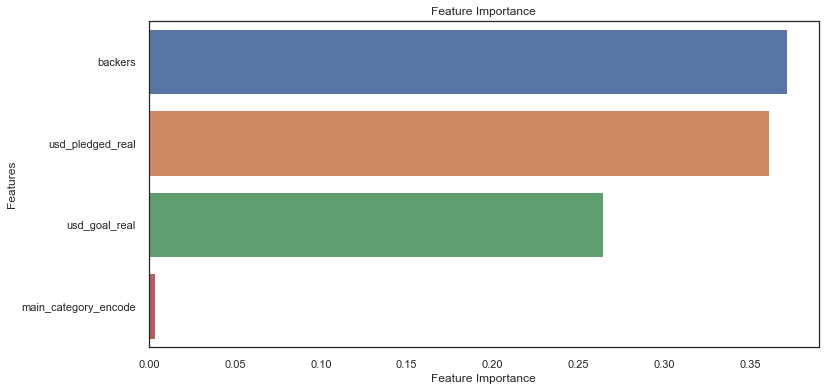

In [117]:
fig=plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'importance', y = 'features', data = feat_import)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [118]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[59153    91]
 [    7 40188]]
Normalized confusion matrix
[[9.98e-01 1.54e-03]
 [1.74e-04 1.00e+00]]


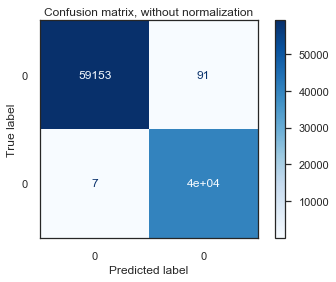

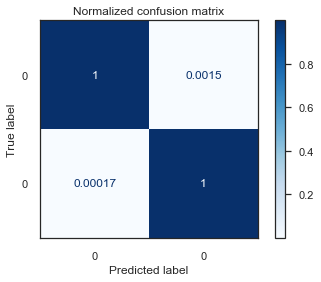

In [120]:
np.set_printoptions(precision=2)
class_names = model.binary_state
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()